In [386]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from IPython import display
import cv2
import numpy as np


In [387]:
!pwd
path="/export/data/dataset/image.cd/cd_8/photos/"
category="location/"
category2="women/"
color=cv2.cvtColor(cv2.imread(path+category+"708078.jpg"), cv2.COLOR_BGR2RGB)

/host/space0/shimizu-d/kadai/2


1. カラー画像を白黒画像に変換しましょう．

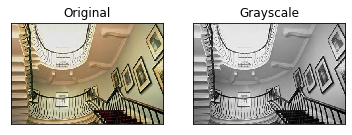

In [388]:
img=color
dst = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap="gray"),plt.title('Grayscale')
plt.xticks([]), plt.yticks([])
plt.show()



2. 平滑化 平滑化は，深層学習のデータ拡張に使えますので，勉強しておきましょう．
フィルタリングによる平滑化 についても勉強しておきましょう． Gaussian filter, Median filter, Bilateral filterを試してみてください． 特に， バイラテラルフィルタは，エッジをぼかさず，近隣画素と差分が小さい領域 のみをぼかすフィルタで，「美肌フィルタ」として使われます．人の顔に試してみまし ょう．

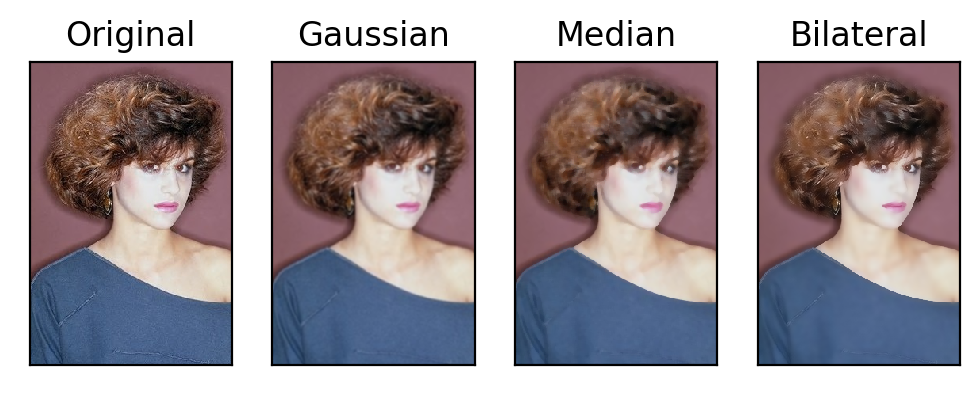

In [389]:
woman=cv2.cvtColor(cv2.imread(path+category2+"653060.jpg"), cv2.COLOR_BGR2RGB)
gaussian = cv2.GaussianBlur(woman,(5,5),0)
median = cv2.medianBlur(woman,5)
bilateral = cv2.bilateralFilter(woman,9,75,75)
fig=plt.figure(dpi=200)

plt.subplot(142),plt.imshow(gaussian),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(bilateral),plt.title('Bilateral')
plt.xticks([]), plt.yticks([])
plt.subplot(141),plt.imshow(woman),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

3. Sobel, Laplacian, Canny の3通りの方法でエッジ抽出します．(余裕のある人は ，Sobel, Laplacian は 最初はopencvの関数を使わないで，3x3フィルタリングによって求めてみましょ う．そして，opencvの関数を使った場合と結果が同じかどうか確認してください．) (参考資料:物体認識論2回目資料)

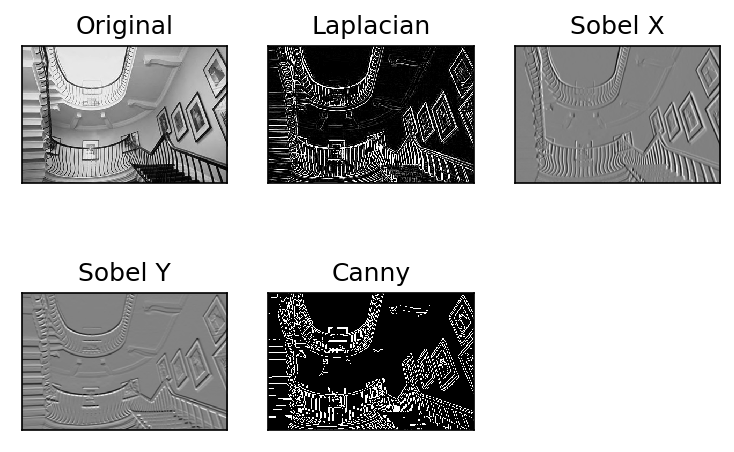

In [390]:
img=dst
fig=plt.figure(dpi=150)
laplacian = cv2.Laplacian(img,cv2.CV_8UC1,ksize=3)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
canny = cv2.Canny(img,100,200)

plt.subplot(2,3,1),plt.imshow(img,cmap="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(laplacian,"gray")
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap="gray")
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap="gray")
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,5),plt.imshow(canny,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])

plt.show()

4. エッジ画像に対して Hough 変換を行って，直線(線分)抽出をします． normal と probabilistic を試してみてください． ([注意] Hough変換には，動物画像でなくて，直線の多い画像(人工物の多い画像 など)をサンプル画像として利用してください．) (参考資料: 物体認識論2回目資料 P.43-)

(11257, 1, 2)


(Text(0.5, 1.0, 'probabilistic'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

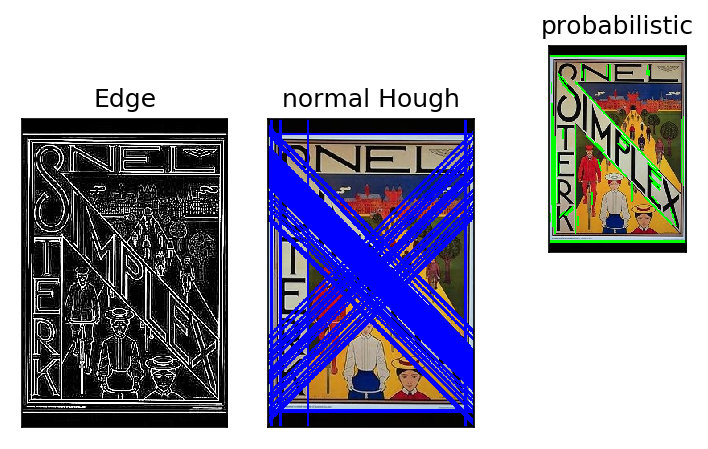

In [391]:
category3="bikeads/"
normal=cv2.cvtColor(cv2.imread(path+category3+"711012.jpg"), cv2.COLOR_BGR2RGB)
prob=normal.copy()
gray = cv2.cvtColor(normal, cv2.COLOR_RGB2GRAY)
edges = cv2.Laplacian(gray,cv2.CV_8UC1,ksize=3)
fig=plt.figure(dpi=150) 
plt.subplot(1,3,1),plt.imshow(edges,cmap="gray")
plt.title('Edge'), plt.xticks([]), plt.yticks([])

lines = cv2.HoughLines(edges,1,np.pi/180,50)
print(lines.shape)
for i in range(50):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(normal,(x1,y1),(x2,y2),(0,0,255),2)

plt.subplot(1,3,2),plt.imshow(normal)
plt.title('normal Hough'), plt.xticks([]), plt.yticks([])
        
minLineLength = 50
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for i in range(50):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(prob,(x1,y1),(x2,y2),(0,255,0),2)


plt.subplot(2,3,3),plt.imshow(prob,cmap="gray")
plt.title('probabilistic'), plt.xticks([]), plt.yticks([])

5. 輪郭線抽出：OpenCV Snake関数の利用によるエッジ画像に対するSnake のサンプル の実行。 (参考資料:大学院講義 P.35-) Python OpenCV snakeの解説ブログやC++ Snakeもどうぞ．

(Text(0.5, 1.0, 'Face recognition'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

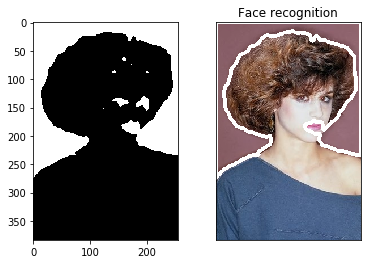

In [462]:
#snake関数がなかったためfindcontoursで代用
########################################

img=woman.copy()
img_HSV=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_HSV = cv2.GaussianBlur(img_HSV, (9, 9), 3)

# detect tulips
img_H, img_S, img_V = cv2.split(img_HSV)
_thre, binary = cv2.threshold(img_H, 120, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i in range(0, len(contours)):
    if len(contours[i]) > 0:

        # remove small objects
        if cv2.contourArea(contours[i]) < 500:
            continue

        cv2.polylines(img, contours[i], True, (255, 255, 255), 5)
plt.subplot(1,2,1),plt.imshow(binary,cmap="gray")
plt.subplot(1,2,2),plt.imshow(img)
plt.title('Face recognition'), plt.xticks([]), plt.yticks([])

6. 顔検出：cvHarrDetectObjects を使って，顔画像検出を試してみましょう． (参考資料:物体認識論1回目 P.17-)

(Text(0.5, 1.0, 'Face recognition'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

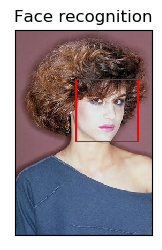

In [406]:
cvpath="/usr/local/anaconda3/lib/python3.7/site-packages/cv2/data/"
cascade = cv2.CascadeClassifier(cvpath+'haarcascade_frontalface_default.xml')
faceimg=woman.copy()

faces = cascade.detectMultiScale(faceimg, scaleFactor=1.1, minNeighbors=2, minSize=(30, 30))
for (x,y,w,h) in faces:
    img = cv2.rectangle(faceimg,(x,y),(x+w,y+h),(255,0,0),2)
fig=plt.figure(dpi=100) 
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Face recognition'), plt.xticks([]), plt.yticks([])

7. 領域分割 OpenCVのサンプルコードを参考にして， k-means法(色のみ, 色+座標), meanshift(PyrMeanShiftFiltering), watershedの４通りを試してみてください．

(384, 256)


(Text(0.5, 1.0, 'Watershed'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

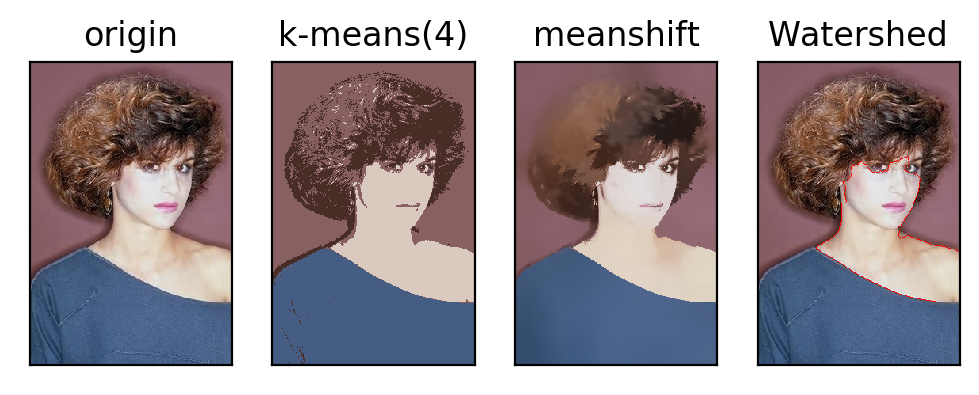

In [407]:
fig=plt.figure(dpi=200) 
plt.subplot(1,4,1),plt.imshow(woman)
plt.title('origin'), plt.xticks([]), plt.yticks([])
Z = woman.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
k_means = res.reshape((img.shape))


plt.subplot(1,4,2),plt.imshow(k_means)
plt.title('k-means(4)'), plt.xticks([]), plt.yticks([])

#####################
# roi.x = roi.y = 0;
# roi.width = src_img->width & -(1 << level);
# roi.height = src_img->height & -(1 << level);
# cvSetImageROI (src_img, roi);

# // (3)分割結果画像出力用の画像領域を確保し，領域分割を実行
# dst_img = cvCloneImage (src_img);

# cvPyrMeanShiftFiltering (src_img, dst_img, 30.0, 30.0, level,
#                        cvTermCriteria (CV_TERMCRIT_ITER + CV_TERMCRIT_EPS, 5, 1)

meanshift = cv2.pyrMeanShiftFiltering(woman,20, 50)                        

plt.subplot(1,4,3),plt.imshow(meanshift)
plt.title('meanshift'), plt.xticks([]), plt.yticks([])
#####################
watershed=woman.copy()
gray = cv2.cvtColor(woman, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0

print(markers.shape)
markers2 = cv2.watershed(watershed,markers)
watershed[markers2==-1]=[255,0,0]
plt.subplot(1,4,4),plt.imshow(watershed)
plt.title('Watershed'), plt.xticks([]), plt.yticks([])

8. ポアソンブレンディング 画像合成についても勉強してみましょう． GANが流行っていますが，2枚の画像の合成ならCGの手法の方が きれいにできます．GANで物体を生成して，背景はこの手法で 合成することもできます．もしくは，物体画像と背景画像を 自由に組み合わせて，深層学習の，特にobject detection 用の 学習データ生成にも使えるでしょう． なお，Seamless-cloningは，Poisson blending の別名です．
他のサンプルコードで，面白そうなのがあれば試してみて下さい． 分からないことがあれば，SlackでM1,M2に聞いてください．同じ課題を やっていますので，教えてもらえるでしょう．

(76, 115, 3)


(Text(0.5, 1.0, 'blending'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

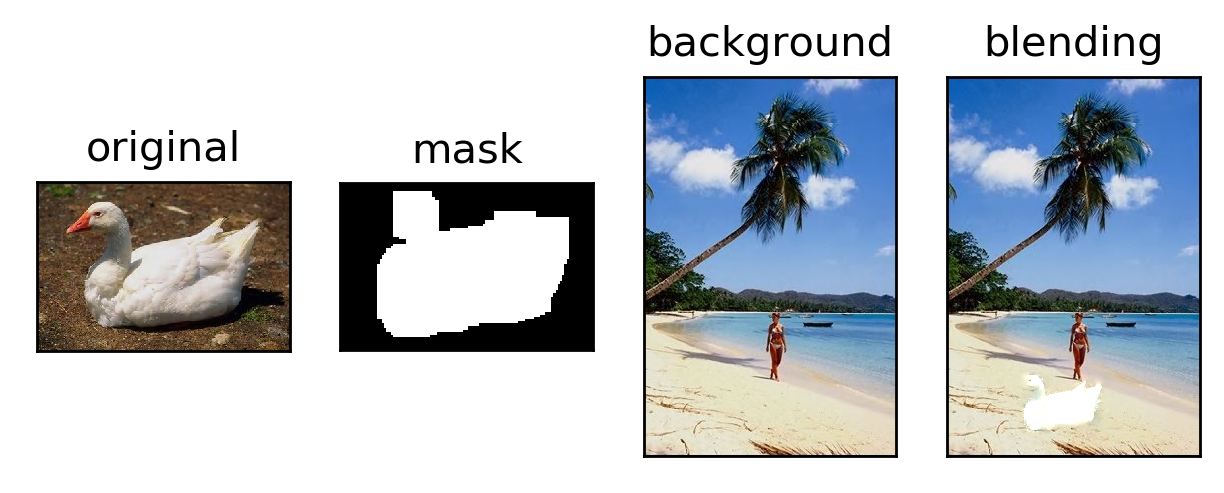

In [408]:
target  = cv2.imread(path+'barnyard/'+'66006.jpg')
height = target.shape[0]
width = target.shape[1]
fig=plt.figure(dpi=250) 
plt.subplot(1,4,1),plt.imshow(cv2.cvtColor(target,cv2.COLOR_BGR2RGB))
plt.title('original'), plt.xticks([]), plt.yticks([])
target = cv2.resize(target , (int(width*0.3), int(height*0.3)))
base  = cv2.imread(path+'beach/'+'798094.jpg')



ret, mask = cv2.threshold(cv2.cvtColor(target,cv2.COLOR_BGR2GRAY),80,255,cv2.THRESH_BINARY)
mask=cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
kernel = np.ones((3,3),np.uint8)
mask = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel, iterations = 3)
mask = cv2.dilate(mask,kernel,iterations = 5)

print(mask.shape)



plt.subplot(1,4,2),plt.imshow(mask,cmap="gray")
plt.title('mask'), plt.xticks([]), plt.yticks([])

point = (int(base.shape[0]/2-int(target.shape[0])),330)
result1 = cv2.seamlessClone( target, base, mask, point, cv2.NORMAL_CLONE)



plt.subplot(1,4,3),plt.imshow(cv2.cvtColor(base,cv2.COLOR_BGR2RGB))
plt.title('background'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(cv2.cvtColor(result1,cv2.COLOR_BGR2RGB))
plt.title('blending'), plt.xticks([]), plt.yticks([])


【フレームワークを使わない深層学習】
大学院講義の第1回課題1, 2 「フレームワークを使わない深層学習」をやってみましょう． CNNに対する理解が十分でない場合は，第1回課題に取り組む前に， 「０から分かる深層学習(2017)」「これならわかる深層学習(2018)」の 深層学習勉強会スライドをざっと見て勉強してください． forward/backward, im2col/col2imの計算方法を確認してください． 大学院講義資料 (ID:system, PW:recognition)も参考にしてください．

In [420]:
import math
class Fc:
    def __init__(self, n_in, n_out, relu=True, seed=0):
        self.n_in=n_in
        self.n_out=n_out
        self.relu=relu
        # w,b は全結合層の学習パラメータ．
        # ReLuも全結合の中に含めてあります．
        # ReLU=Trueのときは，Heの初期値．Falseのときは，Xavierの初期値とします．．
        # xは直前のforward計算時の入力値．BPの計算時に必要．
        np.random.seed(seed) # 同じ初期値を再現できるように seed を指定します．
        if relu:
            self.w=np.random.normal(0, math.sqrt(2.0/n_in), (n_out, n_in)) # Heの初期値
            self.relu0=None # ReLUの順伝搬時に０以下で値が伝搬されない要素のインデックスを記録．BP時に利用．
        else:
            self.w=np.random.normal(0, math.sqrt(1.0/n_in), (n_out, n_in)) # Xavierの初期値   
        self.b=np.zeros((n_out,1))
        self.x=np.zeros((n_in,1))
        #　誤差逆伝搬(Back-Propagation時の勾配を記録する変数)
        self.dEdx=np.zeros((n_in,1)) # dE/dx を表す　BPの時に直前レイヤに伝わる勾配でδと表現されます．
        self.dEdw=np.zeros((n_out,n_in)) # dE/dw を表す
        self.dEdb=np.zeros((n_out,1)) # dE/db を表す
        self.count=0
        # 以下，MomentamSDGのための設定
        self.mdw=np.zeros((n_out,n_in))
        self.mdb=np.zeros((n_out,1))

    # forward は __call__ を使って定義する．単純な 行列＊ベクトル＋ベクトル　の計算．
    def __call__(self,x): 
        self.x = x
        self.y = np.dot(self.w, x) + self.b
        # ReLUは，値が０以下の要素は，０とする．０とした要素のインデックスは relu0に記録し，BP時に勾配を伝搬させない．
        if self.relu:
            self.relu0= self.y<=0
            self.y[self.relu0]=0
        return self.y

    # backward は，dE/dy を受け取って，dE/dx を出力．内部では，dE/dw, dE/db を更新
    def backward(self, dEdy):
          # 順伝搬時に値が０以下だった要素は勾配を０として，勾配伝搬しない．
          if self.relu:
              dEdy[self.relu0]=0
          dydx = np.transpose(self.w)  # dWx/dx= np.transpose(W) であることより．
          dydw = np.transpose(self.x)  # dWx/dW= np.transpose(x) 
          # dydb = np.ones((self.n_out,1))   #  db/db = np.ones((n_out,1))　１なので特に計算しない．
          # dEdw, dEdb に勾配を加算．dEdx (δ)は前層へ伝搬する勾配で，backwardの返り値とする．
          self.dEdx = np.dot(dydx, dEdy)
          self.dEdw += np.dot(dEdy, dydw)
          self.dEdb += dEdy
          self.count +=1  # 勾配の平均を取るために，足した勾配のサンプル数を記録．
          return self.dEdx

    # 勾配をクリア
    def clear_grad(self):
        self.dEdw=0
        self.dEdb=0
        self.count=0

    # 勾配法で重みをアップデート．countで割って，足しこんだ勾配のサンプル数で平均を取る
    def update(self, lr=0.001):
        self.w -= self.dEdw/self.count * lr
        self.b -= self.dEdb/self.count * lr
        self.clear_grad()
    
    # 慣性項（モーメンタム項）付きの勾配法
    def updatem(self, lr=0.001, mu=0.9):
        self.mdw = mu*self.mdw - self.dEdw/self.count*lr
        self.mdb = mu*self.mdb - self.dEdb/self.count*lr
        self.w += self.mdw
        self.b += self.mdb
        self.clear_grad()

In [398]:
fc1=Fc(1,20)
fc2=Fc(20,20)
fc3=Fc(20,1,False)

def f(x):
    return 0.5*(x-2)**2-5

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)

# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)

loss_val: [[579.46638899]]


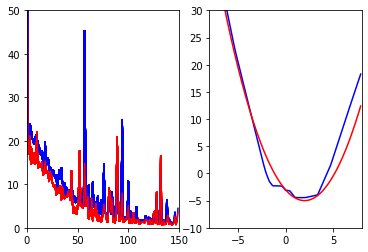

In [399]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

x0=np.reshape(X_val,[-1])

lr=0.001 #学習率
num_epoch=150 # エポック数
num_batch=100 # mini-batch サイズ
#plt.hold(False)
losses=np.array([])
losses_val=np.array([])
ep=np.array([])
# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
for epoch in range(num_epoch):
# Stochastic Gradient Descent なので，epochごとに学習データをシャッフルします．
    shuffler = np.random.permutation(num_train)
    X_train=X_train[shuffler]
    Y_train=Y_train[shuffler]
    for n in range(0, num_train, num_batch):
        loss=0
        for i in range(num_batch):
            # 順伝搬計算
            y=fc3(fc2(fc1(np.c_[X_train[n+i]])))
            # 誤差微分値，誤差値を計算します． 
            dEdx=y-np.c_[Y_train[n+i]]
            loss+=(dEdx**2)*0.5
            # dEdx (δ)を計算して，逆伝搬します．
            dEdx=fc3.backward(dEdx)
            dEdx=fc2.backward(dEdx)
            dEdx=fc1.backward(dEdx)
        # minibatch の順伝搬，逆伝搬を行ったら，SDGで重みを更新
        fc1.update(lr)
        fc2.update(lr)
        fc3.update(lr)
        # 各epochの最初にグラフ表示を行います．
        if n==0:
            #print "[%d %d] loss: %f" % (epoch,n,loss/num_batch)
            losses=np.append(losses,loss/num_batch)
            ep=np.append(ep,epoch)
            # 検証用データの評価
            loss_val=0
            Y_pred=np.array([])
            for i in range(num_val):
                # 順伝搬計算
                y=fc3(fc2(fc1(np.c_[X_val[i]])))
                Y_pred=np.append(Y_pred,y)
                # 誤差微分値，誤差値 
                dEdx=y-np.c_[Y_val[i]]
                loss_val+=(dEdx**2)*0.5    
                # print y, Y_val[i], (dEdx**2)*0.5
            losses_val=np.append(losses_val, loss_val/num_val)
        
            display.clear_output(wait = True)
            fig1.axis([0, num_epoch, 0, 50])
            fig1.plot(ep,losses,"b")
            fig1.plot(ep,losses_val,"r")
            fig2.axis([-8,8,-10,30])
            y0=np.reshape(Y_pred,[-1])
            fig2.plot(x0,y0,"b")
            fig2.plot(x0,f(x0),"r")
            display.display(fig)
            if epoch<num_epoch-1:
                fig2.cla()
                
display.clear_output(wait = True)
print("loss_val:",loss_val)

課題1
以下の小問の(1)-(5)を解答し，さらに(6)-(9)を1つ以上選択し回答すること．

1. 上記のコードにおける全結合層の順伝搬，逆伝搬の計算方法を説明し，上記のコードを実行せよ．

順伝播は，入力の行列とベクトルの重みとの行列積とバイアスの和で計算．

逆伝播は，順伝播から計算された予測値ｙとテストデータｙ’から算出した損失値Ｅを微分し，dEdyを入力として受け取る．
dy/dx=w.T なのでdE/dx=dE/dy* dy/dx
dy/dw=x.T なのでdE/dw=dE/dy* dy/dw　がそれぞれ計算でき，ここでのdE/dxは逆向きの次の層にとってのdE/dyとなる．これにより誤差を逆向きに次々と伝播していき各層での誤差勾配を計算する．
その後各バッチが終わるごとに勾配法によってこれらの誤差勾配から重みを更新する．

In [ ]:
実行結果は以下

2. Reluを３層ともFalseにした場合の結果はどうなるか？ 予想して実際に試してみよ．

予想：非線形問題であるため活性化関数にReLUがないと解くことができない．

In [394]:
fc1=Fc(1,20,False)
fc2=Fc(20,20,False)
fc3=Fc(20,1,False)

def f(x):
    return 0.5*(x-2)**2-5

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)

# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)

loss_val: [[10695.93438748]]


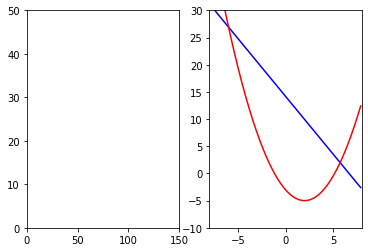

In [395]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

x0=np.reshape(X_val,[-1])

lr=0.001 #学習率
num_epoch=150 # エポック数
num_batch=100 # mini-batch サイズ
#plt.hold(False)
losses=np.array([])
losses_val=np.array([])
ep=np.array([])
# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
for epoch in range(num_epoch):
# Stochastic Gradient Descent なので，epochごとに学習データをシャッフルします．
    shuffler = np.random.permutation(num_train)
    X_train=X_train[shuffler]
    Y_train=Y_train[shuffler]
    for n in range(0, num_train, num_batch):
        loss=0
        for i in range(num_batch):
            # 順伝搬計算
            y=fc3(fc2(fc1(np.c_[X_train[n+i]])))
            # 誤差微分値，誤差値を計算します． 
            dEdx=y-np.c_[Y_train[n+i]]
            loss+=(dEdx**2)*0.5
            # dEdx (δ)を計算して，逆伝搬します．
            dEdx=fc3.backward(dEdx)
            dEdx=fc2.backward(dEdx)
            dEdx=fc1.backward(dEdx)
        # minibatch の順伝搬，逆伝搬を行ったら，SDGで重みを更新
        fc1.update(lr)
        fc2.update(lr)
        fc3.update(lr)
        # 各epochの最初にグラフ表示を行います．
        if n==0:
            #print "[%d %d] loss: %f" % (epoch,n,loss/num_batch)
            losses=np.append(losses,loss/num_batch)
            ep=np.append(ep,epoch)
            # 検証用データの評価
            loss_val=0
            Y_pred=np.array([])
            for i in range(num_val):
                # 順伝搬計算
                y=fc3(fc2(fc1(np.c_[X_val[i]])))
                Y_pred=np.append(Y_pred,y)
                # 誤差微分値，誤差値 
                dEdx=y-np.c_[Y_val[i]]
                loss_val+=(dEdx**2)*0.5    
                # print y, Y_val[i], (dEdx**2)*0.5
            losses_val=np.append(losses_val, loss_val/num_val)
        
            display.clear_output(wait = True)
            fig1.axis([0, num_epoch, 0, 50])
            fig1.plot(ep,losses,"b")
            fig1.plot(ep,losses_val,"r")
            fig2.axis([-8,8,-10,30])
            y0=np.reshape(Y_pred,[-1])
            fig2.plot(x0,y0,"b")
            fig2.plot(x0,f(x0),"r")
            display.display(fig)
            if epoch<num_epoch-1:
                fig2.cla()
                
display.clear_output(wait = True)
print("loss_val:",loss_val)

3. モデルパラメータ（例えば，10->30) を変化させて，結果を比較せよ．(特に最終loss値)

In [400]:
fc1=Fc(1,20)
fc2=Fc(20,30)#20->30増加
fc3=Fc(30,1,False)

def f(x):
    return 0.5*(x-2)**2-5

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)

# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)

loss_val: [[98.54642913]]


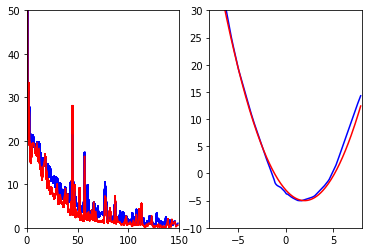

In [401]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

x0=np.reshape(X_val,[-1])

lr=0.001 #学習率
num_epoch=150 # エポック数
num_batch=100 # mini-batch サイズ
#plt.hold(False)
losses=np.array([])
losses_val=np.array([])
ep=np.array([])
# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
for epoch in range(num_epoch):
# Stochastic Gradient Descent なので，epochごとに学習データをシャッフルします．
    shuffler = np.random.permutation(num_train)
    X_train=X_train[shuffler]
    Y_train=Y_train[shuffler]
    for n in range(0, num_train, num_batch):
        loss=0
        for i in range(num_batch):
            # 順伝搬計算
            y=fc3(fc2(fc1(np.c_[X_train[n+i]])))
            # 誤差微分値，誤差値を計算します． 
            dEdx=y-np.c_[Y_train[n+i]]
            loss+=(dEdx**2)*0.5
            # dEdx (δ)を計算して，逆伝搬します．
            dEdx=fc3.backward(dEdx)
            dEdx=fc2.backward(dEdx)
            dEdx=fc1.backward(dEdx)
        # minibatch の順伝搬，逆伝搬を行ったら，SDGで重みを更新
        fc1.update(lr)
        fc2.update(lr)
        fc3.update(lr)
        # 各epochの最初にグラフ表示を行います．
        if n==0:
            #print "[%d %d] loss: %f" % (epoch,n,loss/num_batch)
            losses=np.append(losses,loss/num_batch)
            ep=np.append(ep,epoch)
            # 検証用データの評価
            loss_val=0
            Y_pred=np.array([])
            for i in range(num_val):
                # 順伝搬計算
                y=fc3(fc2(fc1(np.c_[X_val[i]])))
                Y_pred=np.append(Y_pred,y)
                # 誤差微分値，誤差値 
                dEdx=y-np.c_[Y_val[i]]
                loss_val+=(dEdx**2)*0.5    
                # print y, Y_val[i], (dEdx**2)*0.5
            losses_val=np.append(losses_val, loss_val/num_val)
        
            display.clear_output(wait = True)
            fig1.axis([0, num_epoch, 0, 50])
            fig1.plot(ep,losses,"b")
            fig1.plot(ep,losses_val,"r")
            fig2.axis([-8,8,-10,30])
            y0=np.reshape(Y_pred,[-1])
            fig2.plot(x0,y0,"b")
            fig2.plot(x0,f(x0),"r")
            display.display(fig)
            if epoch<num_epoch-1:
                fig2.cla()
                
display.clear_output(wait = True)
print("loss_val:",loss_val)

元の時より1/5以上ロスは減少した．

loss_val: [[579.46638899]]


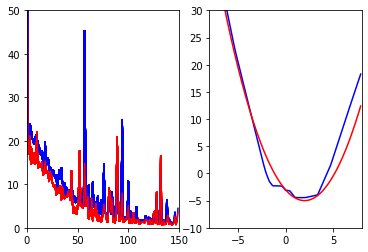

In [399]:
#以下が元のパラメータでの結果

4. 学習率を変化させて挙動を観察せよ．

In [413]:
fc1=Fc(1,20)
fc2=Fc(20,20)
fc3=Fc(20,1,False)

def f(x):
    return 0.5*(x-2)**2-5

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)

# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)

loss_val: [[1674.74272806]]


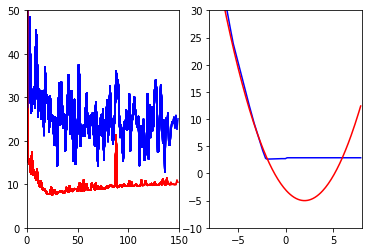

In [414]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

x0=np.reshape(X_val,[-1])

lr=0.002 #学習率
num_epoch=150 # エポック数
num_batch=100 # mini-batch サイズ
#plt.hold(False)
losses=np.array([])
losses_val=np.array([])
ep=np.array([])
# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
for epoch in range(num_epoch):
# Stochastic Gradient Descent なので，epochごとに学習データをシャッフルします．
    shuffler = np.random.permutation(num_train)
    X_train=X_train[shuffler]
    Y_train=Y_train[shuffler]
    for n in range(0, num_train, num_batch):
        loss=0
        for i in range(num_batch):
            # 順伝搬計算
            y=fc3(fc2(fc1(np.c_[X_train[n+i]])))
            # 誤差微分値，誤差値を計算します． 
            dEdx=y-np.c_[Y_train[n+i]]
            loss+=(dEdx**2)*0.5
            # dEdx (δ)を計算して，逆伝搬します．
            
            dEdx=fc3.backward(dEdx)
            dEdx=fc2.backward(dEdx)
            dEdx=fc1.backward(dEdx)
    
        # minibatch の順伝搬，逆伝搬を行ったら，SDGで重みを更新
        
        
        fc1.update(lr)
        fc2.update(lr)
        fc3.update(lr)
        
        
        
        
        # 各epochの最初にグラフ表示を行います．
        if n==0:
            #print "[%d %d] loss: %f" % (epoch,n,loss/num_batch)
            losses=np.append(losses,loss/num_batch)
            ep=np.append(ep,epoch)
            # 検証用データの評価
            loss_val=0
            Y_pred=np.array([])
            for i in range(num_val):
                # 順伝搬計算
                y=fc3(fc2(fc1(np.c_[X_val[i]])))
                Y_pred=np.append(Y_pred,y)
                # 誤差微分値，誤差値 
                dEdx=y-np.c_[Y_val[i]]
                loss_val+=(dEdx**2)*0.5    
                # print y, Y_val[i], (dEdx**2)*0.5
            losses_val=np.append(losses_val, loss_val/num_val)
        
            display.clear_output(wait = True)
            fig1.axis([0, num_epoch, 0, 50])
            fig1.plot(ep,losses,"b")
            fig1.plot(ep,losses_val,"r")
            fig2.axis([-8,8,-10,30])
            y0=np.reshape(Y_pred,[-1])
            fig2.plot(x0,y0,"b")
            fig2.plot(x0,f(x0),"r")
            display.display(fig)
            if epoch<num_epoch-1:
                fig2.cla()
                
display.clear_output(wait = True)
print("loss_val:",loss_val)

0.002だと綺麗な収束にならずうまくいかなかった．

5. モーメンタムSDGに変更して，ノーマルなSDGとの違いを観察せよ．モーメンタムSDGの実装は各自完成させよ．

loss_val: [[8.62055777]]


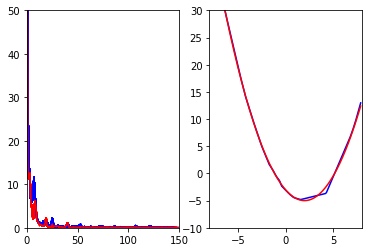

In [421]:
fc1=Fc(1,20)
fc2=Fc(20,20)
fc3=Fc(20,1,False)

def f(x):
    return 0.5*(x-2)**2-5

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)

# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)


###########################
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

x0=np.reshape(X_val,[-1])

lr=0.001 #学習率
num_epoch=150 # エポック数
num_batch=100 # mini-batch サイズ
#plt.hold(False)
losses=np.array([])
losses_val=np.array([])
ep=np.array([])
# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
for epoch in range(num_epoch):
# Stochastic Gradient Descent なので，epochごとに学習データをシャッフルします．
    shuffler = np.random.permutation(num_train)
    X_train=X_train[shuffler]
    Y_train=Y_train[shuffler]
    for n in range(0, num_train, num_batch):
        loss=0
        for i in range(num_batch):
            # 順伝搬計算
            y=fc3(fc2(fc1(np.c_[X_train[n+i]])))
            # 誤差微分値，誤差値を計算します． 
            dEdx=y-np.c_[Y_train[n+i]]
            loss+=(dEdx**2)*0.5
            # dEdx (δ)を計算して，逆伝搬します．
            dEdx=fc3.backward(dEdx)
            dEdx=fc2.backward(dEdx)
            dEdx=fc1.backward(dEdx)
        # minibatch の順伝搬，逆伝搬を行ったら，momentumSDGで重みを更新
        
        
        fc1.updatem(lr)
        fc2.updatem(lr)
        fc3.updatem(lr)
        
        
        
        
        # 各epochの最初にグラフ表示を行います．
        if n==0:
            #print "[%d %d] loss: %f" % (epoch,n,loss/num_batch)
            losses=np.append(losses,loss/num_batch)
            ep=np.append(ep,epoch)
            # 検証用データの評価
            loss_val=0
            Y_pred=np.array([])
            for i in range(num_val):
                # 順伝搬計算
                y=fc3(fc2(fc1(np.c_[X_val[i]])))
                Y_pred=np.append(Y_pred,y)
                # 誤差微分値，誤差値 
                dEdx=y-np.c_[Y_val[i]]
                loss_val+=(dEdx**2)*0.5    
                # print y, Y_val[i], (dEdx**2)*0.5
            losses_val=np.append(losses_val, loss_val/num_val)
        
            display.clear_output(wait = True)
            fig1.axis([0, num_epoch, 0, 50])
            fig1.plot(ep,losses,"b")
            fig1.plot(ep,losses_val,"r")
            fig2.axis([-8,8,-10,30])
            y0=np.reshape(Y_pred,[-1])
            fig2.plot(x0,y0,"b")
            fig2.plot(x0,f(x0),"r")
            display.display(fig)
            if epoch<num_epoch-1:
                fig2.cla()
                
display.clear_output(wait = True)
print("loss_val:",loss_val)

SGDよりも早いepoch数で収束した．

6. 関数  f(x)  を自由に書き換え，実行せよ．

loss_val: [[9.74927621]]


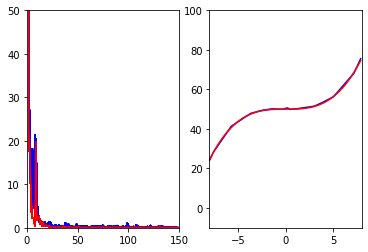

In [431]:
fc1=Fc(1,20)
fc2=Fc(20,20)
fc3=Fc(20,1,False)

def f(x):
    return 0.05*x**3+50#3次関数でもうまく回帰モデルが作成できた

X_train=np.arange(-10,10,0.01,dtype=np.float32)
Y_train= f(X_train)

# X_train, Y_trainは１次元配列なので，reshapeで ２次元の(n,dim)に変換します．dim=1です．
X_train=np.reshape(X_train,[-1,1])   # (2000,)  -> (2000,1)
Y_train=np.reshape(Y_train,[-1,1]) 
num_train=np.size(X_train)

# テスト用の x も準備します．
X_val=np.arange(-8,8,0.1,dtype=np.float32)
Y_val= f(X_val)
X_val=np.reshape(X_val,[-1,1])
Y_val=np.reshape(Y_val,[-1,1])
num_val=np.size(X_val)


###########################
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

x0=np.reshape(X_val,[-1])

lr=0.001 #学習率
num_epoch=150 # エポック数
num_batch=100 # mini-batch サイズ
#plt.hold(False)
losses=np.array([])
losses_val=np.array([])
ep=np.array([])
# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
for epoch in range(num_epoch):
# Stochastic Gradient Descent なので，epochごとに学習データをシャッフルします．
    shuffler = np.random.permutation(num_train)
    X_train=X_train[shuffler]
    Y_train=Y_train[shuffler]
    for n in range(0, num_train, num_batch):
        loss=0
        for i in range(num_batch):
            # 順伝搬計算
            y=fc3(fc2(fc1(np.c_[X_train[n+i]])))
            # 誤差微分値，誤差値を計算します． 
            dEdx=y-np.c_[Y_train[n+i]]
            loss+=(dEdx**2)*0.5
            # dEdx (δ)を計算して，逆伝搬します．
            dEdx=fc3.backward(dEdx)
            dEdx=fc2.backward(dEdx)
            dEdx=fc1.backward(dEdx)
        # minibatch の順伝搬，逆伝搬を行ったら，momentumSDGで重みを更新
        
        
        fc1.updatem(lr)
        fc2.updatem(lr)
        fc3.updatem(lr)
        
        
        
        
        # 各epochの最初にグラフ表示を行います．
        if n==0:
            #print "[%d %d] loss: %f" % (epoch,n,loss/num_batch)
            losses=np.append(losses,loss/num_batch)
            ep=np.append(ep,epoch)
            # 検証用データの評価
            loss_val=0
            Y_pred=np.array([])
            for i in range(num_val):
                # 順伝搬計算
                y=fc3(fc2(fc1(np.c_[X_val[i]])))
                Y_pred=np.append(Y_pred,y)
                # 誤差微分値，誤差値 
                dEdx=y-np.c_[Y_val[i]]
                loss_val+=(dEdx**2)*0.5    
                # print y, Y_val[i], (dEdx**2)*0.5
            losses_val=np.append(losses_val, loss_val/num_val)
        
            display.clear_output(wait = True)
            fig1.axis([0, num_epoch, 0, 50])
            fig1.plot(ep,losses,"b")
            fig1.plot(ep,losses_val,"r")
            fig2.axis([-8,8,-10,100])
            y0=np.reshape(Y_pred,[-1])
            fig2.plot(x0,y0,"b")
            fig2.plot(x0,f(x0),"r")
            display.display(fig)
            if epoch<num_epoch-1:
                fig2.cla()
                
display.clear_output(wait = True)
print("loss_val:",loss_val)

3次関数でも上手くフィッティングが行えた．




課題２

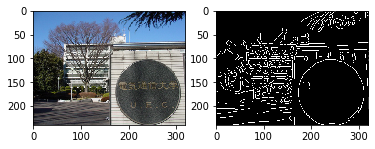

In [446]:
class Conv:
    def __init__(self,c,h,w,n_filter,pad=0,stride=1,relu=True, seed=0):
        self.filter=(c,w,h)
        self.filter_c=c; self.filter_h=h; self.filter_w=w
        self.n_filter=n_filter
        self.pad=pad
        self.stride=stride
        self.relu=relu
        n_in=c*w*h
        self.n_in=n_in
        n_out=n_filter
        # 学習パラメータは, 重み行列w(=フィルタ), バイアス項b
        # サイズは以下の通り
        self.size_w = (n_out,n_in)
        self.size_b = (n_out,1)
        # w,b は全結合層の学習パラメータ．
        # ReLuも全結合の中にいれてある．
        # ReLU=Trueのときは，Heの初期値．Falseのときは，Xavierの初期値とする．
        # xは直前のforward計算時の入力値．BPの計算時に必要． 
        np.random.seed(seed) # 同じ初期値を再現できるように seed を指定します．
        if relu:
            self.w=np.random.normal(0, math.sqrt(2.0/n_in), self.size_w) # Heの初期値
            self.relu0=None # ReLUの順伝搬時に０以下で値が伝搬されない要素のインデックスを記録．BP時に利用．
        else:
            self.w=np.random.normal(0, math.sqrt(1.0/n_in), self.size_w) # Xavierの初期値   
        self.b=np.zeros((n_out,1))
        self.x=np.zeros((n_in,1))
        # 誤差逆伝搬(Back-Propagation時の勾配を記録する変数)
        self.dEdx=np.zeros((n_in,1)) # dE/dx を表す　BPの時に直前レイヤに伝わる勾配でδと表現されます．
        self.dEdw=np.zeros((n_out,n_in)) # dE/dw を表す
        self.dEdb=np.zeros((n_out,1)) # dE/db を表す
        self.count=0
        # 以下，MomentamSDGのための設定
        self.mdw=np.zeros((n_out,n_in))
        self.mdb=np.zeros((n_out,1))
    
    # forward は __call__ を使って定義する．im2col + 行列積和．
    def __call__(self,input):   # 入力はfeature map
        x,out_h,out_w=self.im2col(input) # x のサイズは (self.n_in, out_h*out_w)
        self.x = x
        #self.size_input=input.shape
        #self.size_output=(self.n_filter,out_h,out_w)
        self.out_h=out_h
        self.out_w=out_w
        # w のサイズは，(n_filter, n_in), よって y のサイズは (n_filter,out_h*out_w)
        self.y = np.dot(self.w, x) + self.b
        # ReLUは，値が０以下の要素は，０とする．０とした要素のインデックスは relu0に記録し，BP時に勾配を伝搬させない．
        if self.relu:
            self.relu0= self.y<=0
            self.y[self.relu0]=0
        # 最後に，(n_filter,out_h,out_w) にreshape
        return np.reshape(self.y,(self.n_filter,out_h,out_w))

    # backward は，dE/dy を受け取って，dE/dx を出力．内部では，dE/dw, dE/db を更新
    def backward(self, dEdy0):
        dEdy=np.reshape(dEdy0,(self.n_filter,self.out_h*self.out_w))
        # 順伝搬時に値が０以下だった要素は勾配を０として，勾配伝搬しない．
        if self.relu:
            dEdy[self.relu0]=0
        dydx = np.transpose(self.w)  # dWx/dx= np.transpose(W) であることより．
        dydw = np.transpose(self.x)  # dWx/dW= np.transpose(x) 
        # dydb = np.ones((self.n_out,1))   #  db/db = np.ones((n_out,1))　１なので特に計算しない．
        # dEdw, dEdb に勾配を加算．dEdx (δ)は前層へ伝搬する勾配で，backwardの返り値とする．
        self.dEdx = np.dot(dydx, dEdy)
        self.dEdw += np.dot(dEdy, dydw)
        self.dEdb += np.c_[np.sum(dEdy, axis=1)]  # channelごとにfeature map 全体が1つのバイアスに対応するので channelごとにsumします．
        # 勾配の平均を取るために，足した勾配のサンプル数を記録．
        # conv の場合は，フィルタを適用した回数．つまり，出力feature mapの画素数
        self.count += (self.out_h*self.out_w)  
        # 最後に，col2imでfeature mapに対応するδを求める
        out=self.col2im(self.dEdx)
        return out

    # im2col は，feature map を　縦が1回の畳み込みに必要な局所画像サイズ(filter_c*filter_h*filter_w)，
    # 横が(out_h*out_w) になる行列に変換する関数 
    def im2col(self,input):
        c, h, w = input.shape
        out_h = (h + 2*self.pad - self.filter_h)//self.stride + 1
        out_w = (w + 2*self.pad - self.filter_w)//self.stride + 1
        # padding 分をzero paddingで追加したimを生成
        im = np.pad(input, [(0,0), (self.pad, self.pad), (self.pad, self.pad)], 'constant')
        # filterの各x,yの位置ごとに，対応するfeature mapの値を格納し，
        # 最後に transpose -> reshape で，im2col出力行列を生成
        col = np.zeros((c, self.filter_h, self.filter_w, out_h, out_w))
    
        for y in range(self.filter_h):
            y_max = y + self.stride*out_h
            for x in range(self.filter_w):
                x_max = x + self.stride*out_w
                # filterの位置に応じてずらしてfeature mapをコピー
                # stride>1の時は飛ばしてfeature mapをコピー
                col[:, y, x, :, :] = im[:, y:y_max:self.stride, x:x_max:self.stride]
        # チャネル軸を1番目から3番目に移動して，reshapeして，(filter_c,out_h*out_w)とする
        col = col.transpose(1, 2, 0, 3, 4).reshape((self.n_in, out_h*out_w))
        return col,out_h,out_w

    # col2im は，im2col形式の勾配δをfeature map形式に変換する．逆伝搬で使用．
    def col2im(self,col):
        col_h, col_w = col.shape # (filter_c*filter_h*filter_w, out_h*out_w)
        h = (self.out_h-1)*self.stride + self.filter_h
        w = (self.out_w-1)*self.stride + self.filter_w
        c = self.filter_c
    
        # サイズ(x,h,w)の im 行列を0で初期化
        im = np.zeros((c,h,w))
        # feature map colの各場所について，勾配を対応するimの場所に加算する
        for j in range(self.out_h):
            for i in range(self.out_w):
                im[:, j:j+self.filter_h, i:i+self.filter_w] += np.reshape(col[:, j * self.out_w + i],(c,self.filter_h,self.filter_w))
        return im[:,self.pad:h-self.pad,self.pad:w-self.pad]        

    # 以下は，updater で，Fcと同じ実装です．ちゃんと実装するなら，super classにする方がいいでしょう．
    # 勾配をクリア
    def clear_grad(self):
        self.dEdw=0
        self.dEdb=0
        self.count=0

    # 勾配法で重みをアップデート．countで割って，足しこんだ勾配のサンプル数で平均を取る
    def update(self, lr=0.001):
        self.w -= self.dEdw/self.count * lr
        self.b -= self.dEdb/self.count * lr
        self.clear_grad()
    
    # 慣性項（モーメンタム項）付きの勾配法
    def updatem(self, lr=0.001, mu=0.9):
        self.mdw = mu*self.mdw - self.dEdw/self.count*lr
        self.mdb = mu*self.mdb - self.dEdb/self.count*lr
        self.w += self.mdw
        self.b += self.mdb
        self.clear_grad()
#では，ここでは，簡単な問題として，グレーススケール化とエッジ検出のフィルタを3層の畳み込みネットワークで学習してみましょう．

#とりあえず，画像1枚だけで学習します．畳み込みはフィルタをスライドさせて演算しますので，スライドさせる分だけ別々のデータで学習を行っているのと等価になります．例えば，3x3のフィルタを320x240の画像で学習すれば，320x240通りでスライドできますので，Fc層での学習を76800回行ったのと等価になります．

from skimage import feature,filters
from PIL import Image
import os
import sys
img_org = Image.open('uec.jpg').resize((320,240))
img = np.array(img_org, dtype=np.uint8)
grey = np.array(img_org.convert('L'), dtype=np.uint8)
edge = feature.canny(grey,sigma=2)  # Canny でエッジ抽出
# edge = filters.sobel(grey) # Sobel でエッジ抽出
edge = edge * 255
#読み込んだ画像と変換した画像を，numpy形式に変換します． (c,h,w) c:チャネル, h:高さ, w:幅　のサイズの3次元配列にします． ここでは画像は320x240で，入力はカラーなので， input: (3,240,320) output: (1,240,320) の大きさです．

from matplotlib import pyplot as plt
# 以下の２行はJupyter環境の場合のみ必要
%matplotlib inline
from IPython import display

# エッジ検出フィルタ，グレースケール化フィルタの切り替え
use_edge=True  # Falseだとグレースケール化フィルタの学習
if use_edge:
    gt=edge
else:
    gt=grey

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(gt,cmap="gray")

# 画素値が [-1,1) の範囲の値になるように変換
input  = (np.asarray(img, dtype=np.float32).transpose(2,0,1)-128)/128.0
output = (np.expand_dims(np.asarray(gt, dtype=np.float32),0)-128)/128.

In [397]:
c1=Conv(3,3,3,10,pad=1)
c2=Conv(10,3,3,10,pad=1)
c3=Conv(10,3,3,1,pad=1,relu=0)

lr=0.01
num_epoch=200
losses=np.array([])
ep=np.array([])

# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

for epoch in range(num_epoch):
    if epoch>0 and epoch%100==0:
        lr*=0.1
    # 順伝搬計算
    y=c3(c2(c1(input)))
    # 誤差微分値，誤差値を計算します． 
    dEdx=y-output
    loss=np.sum(dEdx**2)*0.5/(y.shape[1]*y.shape[2])
    print("ephoch:",epoch," loss:",loss," lr:",lr)
    # dEdx (δ)を計算して，逆伝搬します．
    dEdx=c3.backward(dEdx)
    dEdx=c2.backward(dEdx)
    dEdx=c1.backward(dEdx)
    # 順伝搬，逆伝搬を行ったら，SDGで重みを更新
    # out_h*out_w 分の順伝搬の勾配がすべて合計されていますので，
    # batchsize 1 でも，実質batchisizeは out_h*out_w (例えば，320*240だと76800)になります．
    c1.update(lr)
    c2.update(lr)
    c3.update(lr)
  
    losses=np.append(losses,loss)
    ep=np.append(ep,epoch)
    if epoch%10==0:
        display.clear_output(wait = True)
        fig1.axis([0, num_epoch, 0, 0.5])
        fig1.plot(ep,losses,"r")
        out=(y.squeeze()+1.0)*128.0 # 表示するときは，[0.256)に戻します．
        fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
        display.display(fig)
        if epoch<num_epoch-1:
            fig2.cla()
            
display.clear_output(wait = True)
fig1.plot(ep,losses,"r")
fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
print("loss:",loss)

loss: 0.1699579706972044


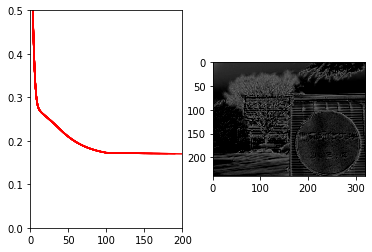

以下の小問の(1)-(5)を解答せよ．

（１）上記のコードにおける畳込み層の順伝搬，逆伝搬の計算方法を説明せよ．さらに，自分で用意した画像に対して，上記のコードを実行せよ．

畳み込み層での順伝播は，重みフィルターをｘ，ｙ方向にずらしながら畳み込み計算を行う．

行列積一括でできるように実際のプログラムでは画像マトリックスを適切なサイズに複製して，縦channel*　filter_h*　filter_w横がout_h*out_wになるような行列にして内積を行う．

    
畳み込み層での逆伝播は，全結合とほぼ同じであるが，最後に逆に勾配行列からカラー次元を増やして画像形式のマトリクスにする．

またチャンネルごとに合計し，平均のカウントはフィルタで畳み込みを行った回数分，出力画素分足し合わせる必要がある．



（２）モデルパラメータ（例えば，10->20) を変化させて，結果を比較せよ．(特に最終loss値)

loss: 0.1737942363770768


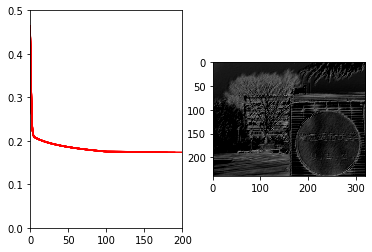

In [434]:
c1=Conv(3,3,3,20,pad=1)
c2=Conv(20,3,3,10,pad=1)
c3=Conv(10,3,3,1,pad=1,relu=0)

lr=0.01
num_epoch=200
losses=np.array([])
ep=np.array([])

# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

for epoch in range(num_epoch):
    if epoch>0 and epoch%100==0:
        lr*=0.1
    # 順伝搬計算
    y=c3(c2(c1(input)))
    # 誤差微分値，誤差値を計算します． 
    dEdx=y-output
    loss=np.sum(dEdx**2)*0.5/(y.shape[1]*y.shape[2])
    print("ephoch:",epoch," loss:",loss," lr:",lr)
    # dEdx (δ)を計算して，逆伝搬します．
    dEdx=c3.backward(dEdx)
    dEdx=c2.backward(dEdx)
    dEdx=c1.backward(dEdx)
    # 順伝搬，逆伝搬を行ったら，SDGで重みを更新
    # out_h*out_w 分の順伝搬の勾配がすべて合計されていますので，
    # batchsize 1 でも，実質batchisizeは out_h*out_w (例えば，320*240だと76800)になります．
    c1.update(lr)
    c2.update(lr)
    c3.update(lr)
  
    losses=np.append(losses,loss)
    ep=np.append(ep,epoch)
    if epoch%10==0:
        display.clear_output(wait = True)
        fig1.axis([0, num_epoch, 0, 0.5])
        fig1.plot(ep,losses,"r")
        out=(y.squeeze()+1.0)*128.0 # 表示するときは，[0.256)に戻します．
        fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
        display.display(fig)
        if epoch<num_epoch-1:
            fig2.cla()
            
display.clear_output(wait = True)
fig1.plot(ep,losses,"r")
fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
print("loss:",loss)

loss: 0.1699579706972044


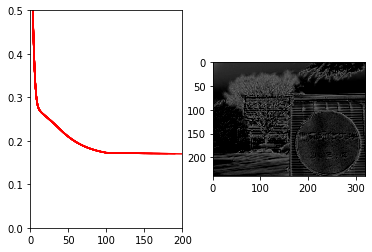

In [397]:
パラメータが増えると少ないエポック数から収束することがわかった．しかし，ロスは高い値であった．

以下は元のパラメータ結果

（３）学習率を変化させて挙動を観察せよ．

loss: 0.1584319514516258


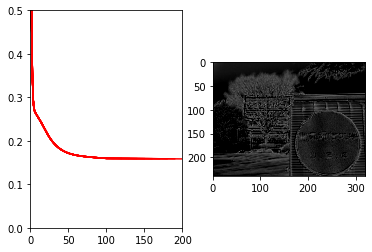

In [435]:
c1=Conv(3,3,3,10,pad=1)
c2=Conv(10,3,3,10,pad=1)
c3=Conv(10,3,3,1,pad=1,relu=0)

lr=0.02
num_epoch=200
losses=np.array([])
ep=np.array([])

# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

for epoch in range(num_epoch):
    if epoch>0 and epoch%100==0:
        lr*=0.1
    # 順伝搬計算
    y=c3(c2(c1(input)))
    # 誤差微分値，誤差値を計算します． 
    dEdx=y-output
    loss=np.sum(dEdx**2)*0.5/(y.shape[1]*y.shape[2])
    print("ephoch:",epoch," loss:",loss," lr:",lr)
    # dEdx (δ)を計算して，逆伝搬します．
    dEdx=c3.backward(dEdx)
    dEdx=c2.backward(dEdx)
    dEdx=c1.backward(dEdx)
    # 順伝搬，逆伝搬を行ったら，SDGで重みを更新
    # out_h*out_w 分の順伝搬の勾配がすべて合計されていますので，
    # batchsize 1 でも，実質batchisizeは out_h*out_w (例えば，320*240だと76800)になります．
    c1.update(lr)
    c2.update(lr)
    c3.update(lr)
  
    losses=np.append(losses,loss)
    ep=np.append(ep,epoch)
    if epoch%10==0:
        display.clear_output(wait = True)
        fig1.axis([0, num_epoch, 0, 0.5])
        fig1.plot(ep,losses,"r")
        out=(y.squeeze()+1.0)*128.0 # 表示するときは，[0.256)に戻します．
        fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
        display.display(fig)
        if epoch<num_epoch-1:
            fig2.cla()
            
display.clear_output(wait = True)
fig1.plot(ep,losses,"r")
fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
print("loss:",loss)

loss: 0.1699579706972044


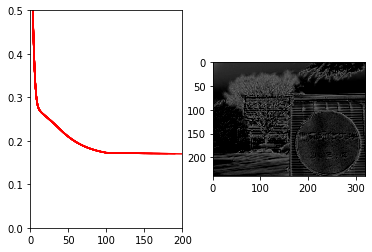

In [397]:
0.002だと少し収束が速く，ロスも小さくなった

以下は元のパラメータ結果

（４）1,2層にReLUを入れた場合と，3層ともReLUなしの場合の結果を比較せよ．

loss: 0.1718895118764003


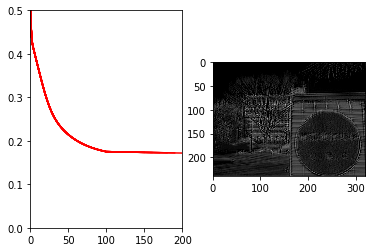

In [436]:
c1=Conv(3,3,3,10,pad=1,relu=0)
c2=Conv(10,3,3,10,pad=1,relu=0)
c3=Conv(10,3,3,1,pad=1,relu=0)

lr=0.01
num_epoch=200
losses=np.array([])
ep=np.array([])

# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

for epoch in range(num_epoch):
    if epoch>0 and epoch%100==0:
        lr*=0.1
    # 順伝搬計算
    y=c3(c2(c1(input)))
    # 誤差微分値，誤差値を計算します． 
    dEdx=y-output
    loss=np.sum(dEdx**2)*0.5/(y.shape[1]*y.shape[2])
    print("ephoch:",epoch," loss:",loss," lr:",lr)
    # dEdx (δ)を計算して，逆伝搬します．
    dEdx=c3.backward(dEdx)
    dEdx=c2.backward(dEdx)
    dEdx=c1.backward(dEdx)
    # 順伝搬，逆伝搬を行ったら，SDGで重みを更新
    # out_h*out_w 分の順伝搬の勾配がすべて合計されていますので，
    # batchsize 1 でも，実質batchisizeは out_h*out_w (例えば，320*240だと76800)になります．
    c1.update(lr)
    c2.update(lr)
    c3.update(lr)
  
    losses=np.append(losses,loss)
    ep=np.append(ep,epoch)
    if epoch%10==0:
        display.clear_output(wait = True)
        fig1.axis([0, num_epoch, 0, 0.5])
        fig1.plot(ep,losses,"r")
        out=(y.squeeze()+1.0)*128.0 # 表示するときは，[0.256)に戻します．
        fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
        display.display(fig)
        if epoch<num_epoch-1:
            fig2.cla()
            
display.clear_output(wait = True)
fig1.plot(ep,losses,"r")
fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
print("loss:",loss)

In [ ]:
収束が遅く．ロスも高い．

loss: 0.1699579706972044


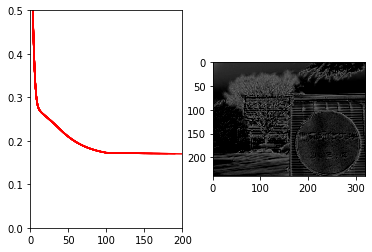

In [397]:
パラメータが増えると少ないエポック数から収束することがわかった．しかし，ロスは高い値であった．

以下は元のパラメータ結果

（５）モーメンタムSDGに変更して，ノーマルなSDGとの違いを観察せよ．

loss: 0.1699579706972044


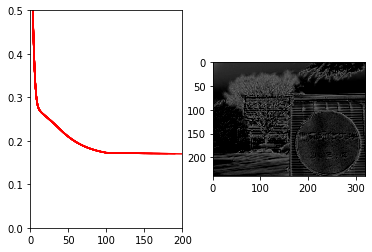

In [448]:
c1=Conv(3,3,3,10,pad=1)
c2=Conv(10,3,3,10,pad=1)
c3=Conv(10,3,3,1,pad=1,relu=0)

lr=0.01
num_epoch=200
losses=np.array([])
ep=np.array([])

# 表示エリアの設定
fig=plt.figure()
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

for epoch in range(num_epoch):
    if epoch>0 and epoch%100==0:
        lr*=0.1
    # 順伝搬計算
    y=c3(c2(c1(input)))
    # 誤差微分値，誤差値を計算します． 
    dEdx=y-output
    loss=np.sum(dEdx**2)*0.5/(y.shape[1]*y.shape[2])
    print("ephoch:",epoch," loss:",loss," lr:",lr)
    # dEdx (δ)を計算して，逆伝搬します．
    dEdx=c3.backward(dEdx)
    dEdx=c2.backward(dEdx)
    dEdx=c1.backward(dEdx)
    # 順伝搬，逆伝搬を行ったら，SDGで重みを更新
    # out_h*out_w 分の順伝搬の勾配がすべて合計されていますので，
    # batchsize 1 でも，実質batchisizeは out_h*out_w (例えば，320*240だと76800)になります
    c1.updatem(lr,mu)
    c2.updatem(lr,mu)
    c3.updatem(lr,mu)
#     c1.update(lr)
#     c2.update(lr)
#     c3.update(lr)
    losses=np.append(losses,loss)
    ep=np.append(ep,epoch)
    if epoch%10==0:
        display.clear_output(wait = True)
        fig1.axis([0, num_epoch, 0, 0.5])
        fig1.plot(ep,losses,"r")
        out=(y.squeeze()+1.0)*128.0 # 表示するときは，[0.256)に戻します．
        fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
        display.display(fig)
        if epoch<num_epoch-1:
            fig2.cla()
            
display.clear_output(wait = True)
fig1.plot(ep,losses,"r")
fig2.imshow(out,cmap="gray",vmin=0,vmax=255)
print("loss:",loss)

loss: 0.1699579706972044


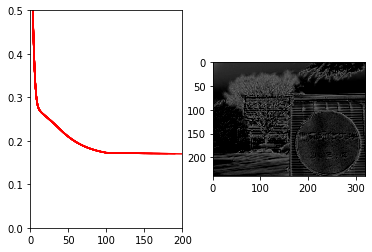

In [397]:
収束の仕方も変わらず，もともとあまり変動が小さい収束の仕方であったので効果は薄いと思われる．

以下は元のパラメータ結果